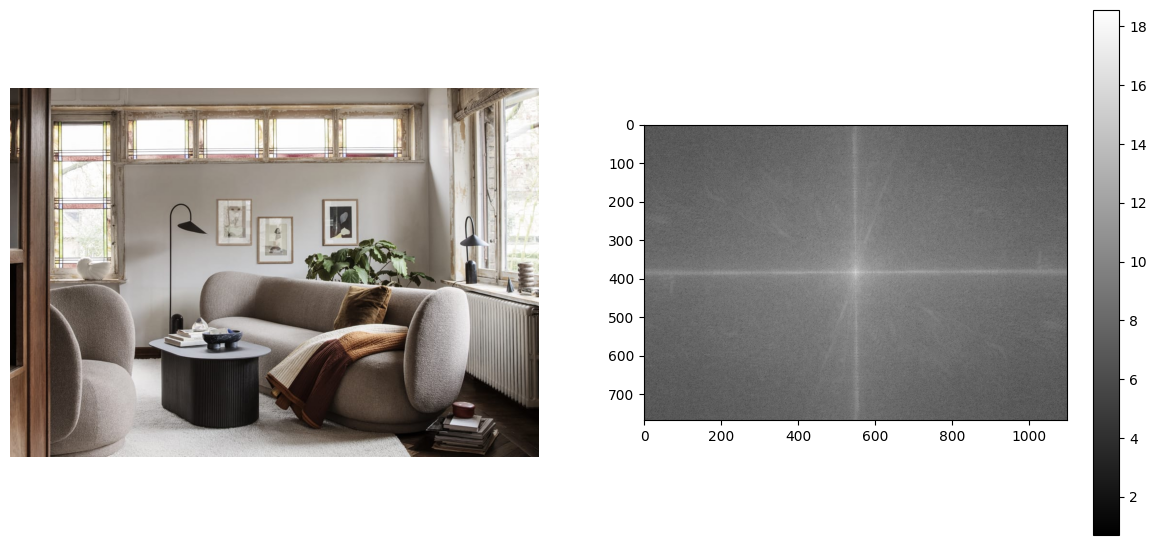

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image_color = cv2.imread('images/image_color.jpg')
def DFT(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    
    magnitude_spectrume = np.log(1 + np.abs(dft_shift))
    
    return magnitude_spectrume

plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB), cmap='gray')
plt.axis(False)

plt.subplot(2, 2, 2)
plt.imshow(DFT(image_color), cmap='gray')
plt.colorbar()

plt.show()

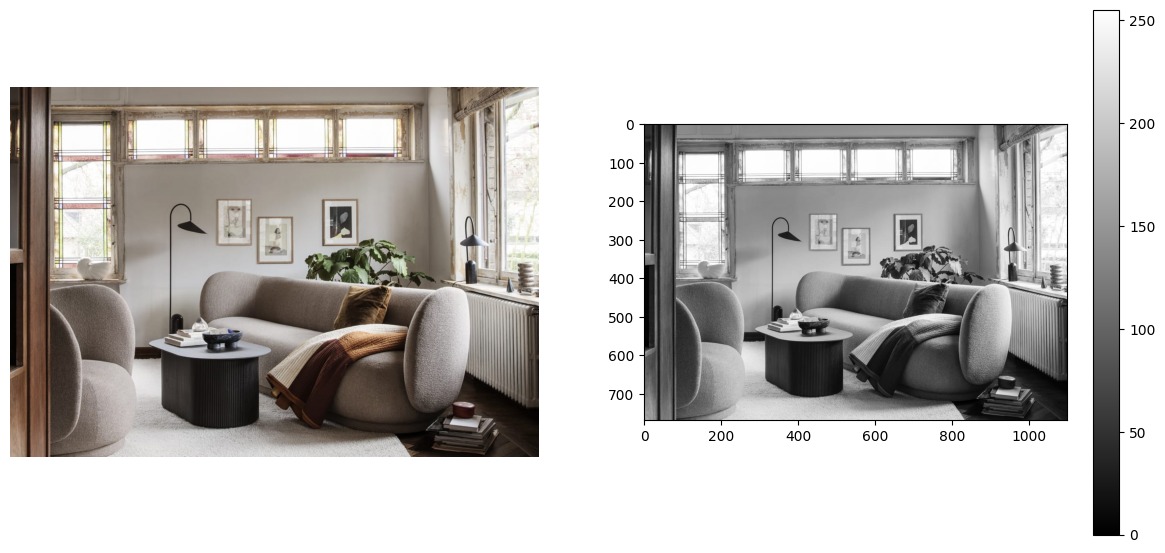

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image_color = cv2.imread('images/image_color.jpg')


def DFT(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    
    magnitude_spectrume = np.log(1 + np.abs(dft_shift))
    
    return magnitude_spectrume, dft_shift


def IFT(dft_shift):
    # dft_shift = DFT(image)[1]
    dft_inverse = np.fft.ifft2(np.fft.ifftshift(dft_shift))
    
    image_reconstructed = np.abs(dft_inverse)
    return image_reconstructed
    


plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB), cmap='gray')
plt.axis(False)

plt.subplot(2, 2, 2)
plt.imshow(IFT(DFT(image_color)[1]), cmap='gray')
plt.colorbar()

plt.show()

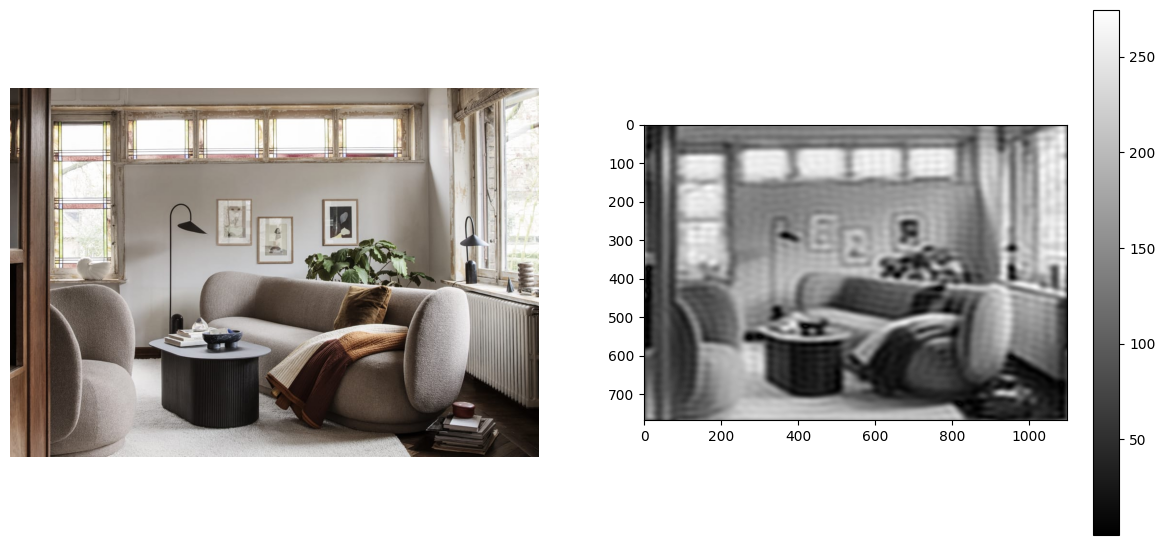

In [8]:
def filter_passe_bas(image, radius):
    magnitude, dft_shift = DFT(image)
    
    L, C = image.shape[:2]
    h_L, h_C = L // 2, C // 2
    mask = np.zeros((L, C), np.uint8)
    
    center = (h_C, h_L)
    cv2.circle(mask, center, radius, 1, -1)
    
    l_pass = dft_shift * mask
    
    l_pass_img = IFT(l_pass)
    
    return l_pass_img


plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB), cmap='gray')
plt.axis(False)

plt.subplot(2, 2, 2)
plt.imshow(filter_passe_bas(image_color, 40), cmap='gray')
plt.colorbar()

plt.show()

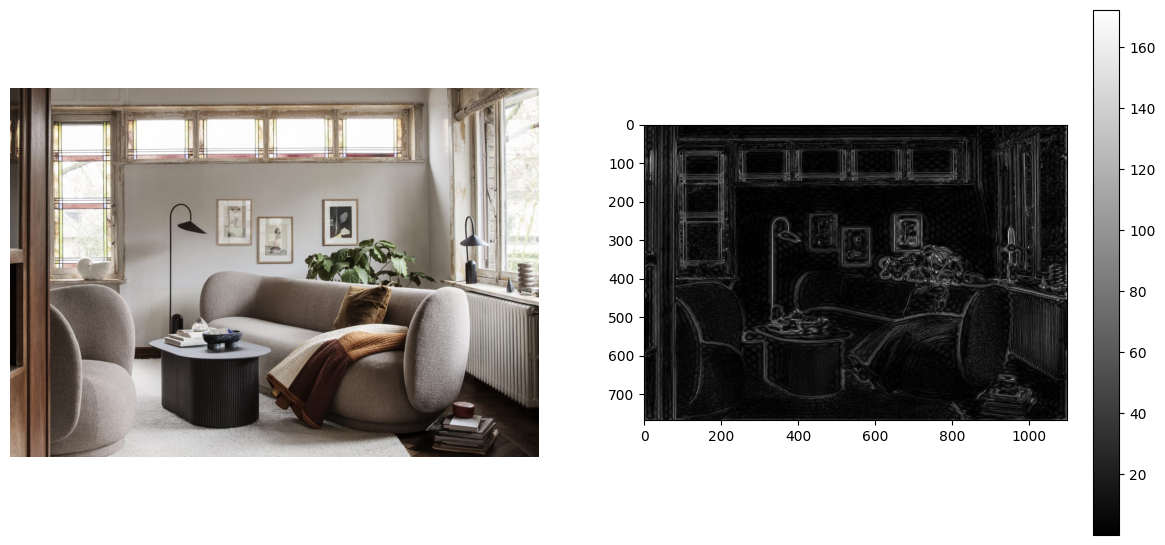

In [10]:
def filter_passe_haut(image, radius):
    _, dft_shift = DFT(image)
    
    L, C = image.shape[:2]
    h_L, h_C = L // 2, C // 2
    mask = np.ones((L, C), np.uint8)
    
    center = (h_C, h_L)
    cv2.circle(mask, center, radius, 0, -1)
    
    h_pass = dft_shift * mask
    
    h_pass_img = IFT(h_pass)
    
    return h_pass_img


plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB), cmap='gray')
plt.axis(False)

plt.subplot(2, 2, 2)
plt.imshow(filter_passe_haut(image_color, 40), cmap='gray')
plt.colorbar()

plt.show()